### Libraries

In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Data Import

In [158]:
df = pd.read_csv("BostonHousing.csv")

In [159]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [156]:
df.shape

(501, 14)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     501 non-null    float64
 1   zn       501 non-null    float64
 2   indus    501 non-null    float64
 3   chas     501 non-null    int64  
 4   nox      501 non-null    float64
 5   rm       501 non-null    float64
 6   age      501 non-null    float64
 7   dis      501 non-null    float64
 8   rad      501 non-null    int64  
 9   tax      501 non-null    int64  
 10  ptratio  501 non-null    float64
 11  b        501 non-null    float64
 12  lstat    501 non-null    float64
 13  medv     501 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 58.7 KB


- crim: Per capita crime rate by town.
- zn: Proportion of large residential lots (over 25,000 sq. ft.).
- indus: Proportion of non-retail business acres per town.
- Chas: Binary variable indicating if the property is near Charles River (1 for yes, 0 for no).
- nox: Concentration of nitrogen oxides in the air.
- rm: Average number of rooms per dwelling.
- age: Proportion of old owner-occupied units built before 1940.
- dis: Weighted distances to Boston employment centers.
- rad: Index of accessibility to radial highways.
- tax: Property tax rate per $10,000.

<Axes: >

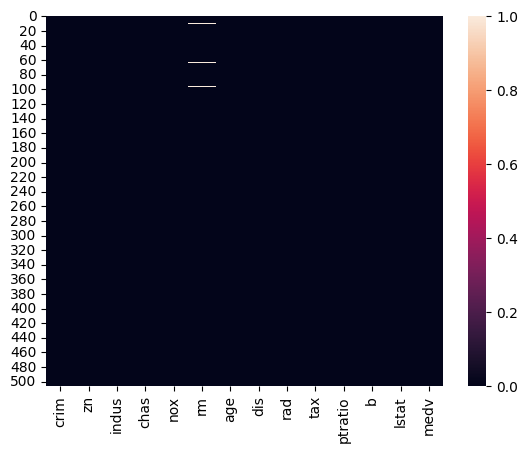

In [160]:
sns.heatmap(df.isnull())

In [161]:
df = df.dropna()

In [162]:
df.duplicated().sum()

0

there are no duplicate values in this dataset

### Statistics on numerical columns

In [148]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,3.647414,11.402196,11.160619,0.069860,0.555151,6.284341,68.513373,3.786423,9.596806,409.143713,18.453493,356.298523,12.643752,22.561277
std,8.637688,23.414214,6.857123,0.255166,0.116186,0.705587,28.212221,2.103327,8.735509,169.021216,2.166327,91.672055,7.162746,9.232435
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081990,0.000000,5.190000,0.000000,0.449000,5.884000,45.000000,2.088200,4.000000,279.000000,17.400000,375.210000,6.920000,17.000000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.182700,5.000000,330.000000,19.000000,391.340000,11.380000,21.200000
75%,3.693110,12.500000,18.100000,0.000000,0.624000,6.625000,94.000000,5.118000,24.000000,666.000000,20.200000,396.230000,16.940000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: >

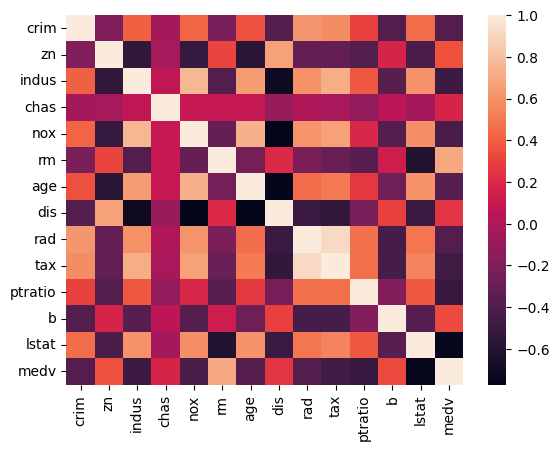

In [163]:
sns.heatmap(df.corr())

In [164]:
df.corr()["medv"].sort_values()

lstat     -0.737720
ptratio   -0.511897
indus     -0.486625
tax       -0.471253
nox       -0.428812
crim      -0.390251
rad       -0.384730
age       -0.375437
chas       0.174679
dis        0.251709
b          0.335387
zn         0.360031
rm         0.696169
medv       1.000000
Name: medv, dtype: float64

### Outlier detection

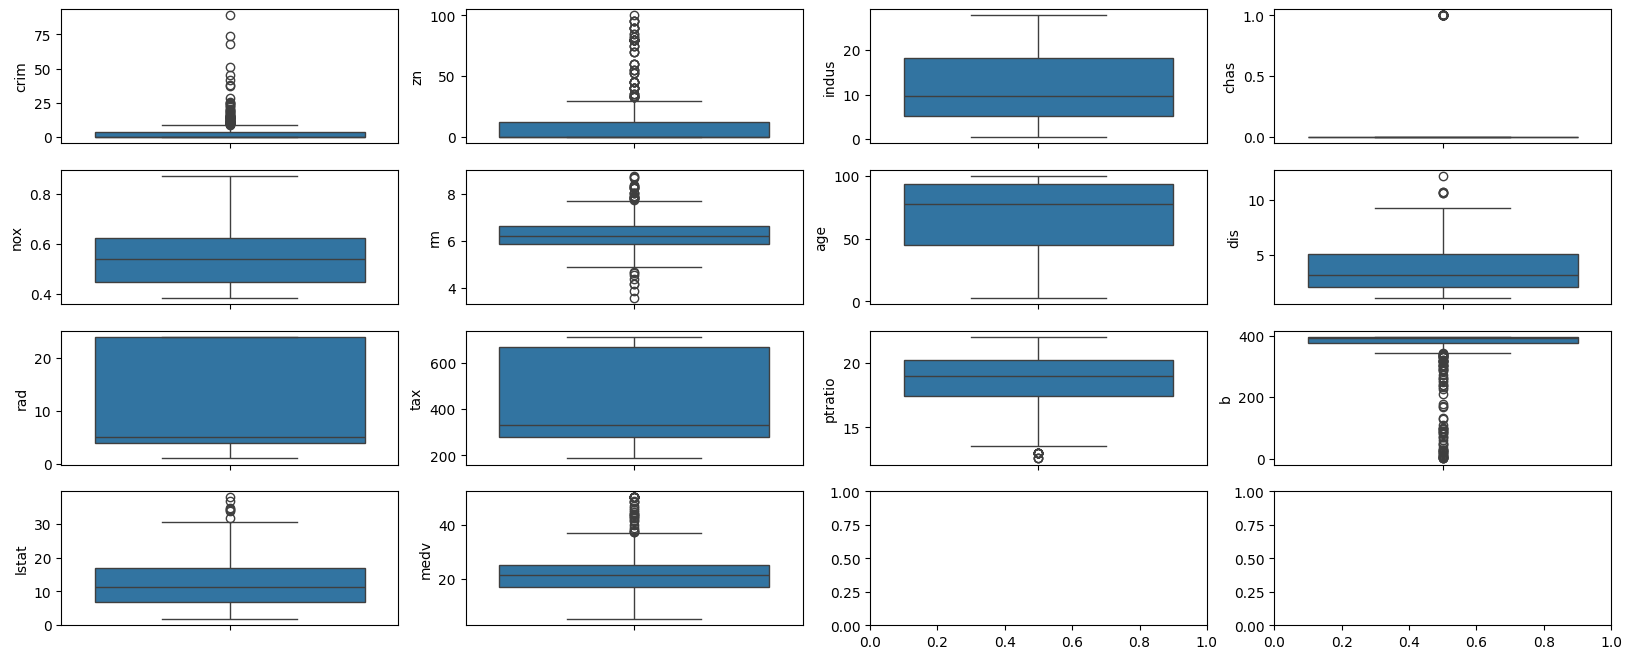

In [166]:
fig, ax = plt.subplots(4, 4, figsize=(20, 8))

ax = ax.flatten()

cnt = 0
for column in df.select_dtypes("number").columns:
  sns.boxplot(df[column], ax = ax[cnt])
  cnt += 1

We have many outliers so we'll perform capping as we don't wanna lose data.

### Outlier treatment (capping)

In [167]:
for column in df.select_dtypes("number").columns:
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  IQR = q3 - q1

  up_range = q3 + 1.5 * IQR
  down_range = q1 - 1.5 * IQR

  df[column] = df[column].apply(lambda x: up_range if x > up_range else x)
  df[column] = df[column].apply(lambda x: down_range if x < down_range else x)

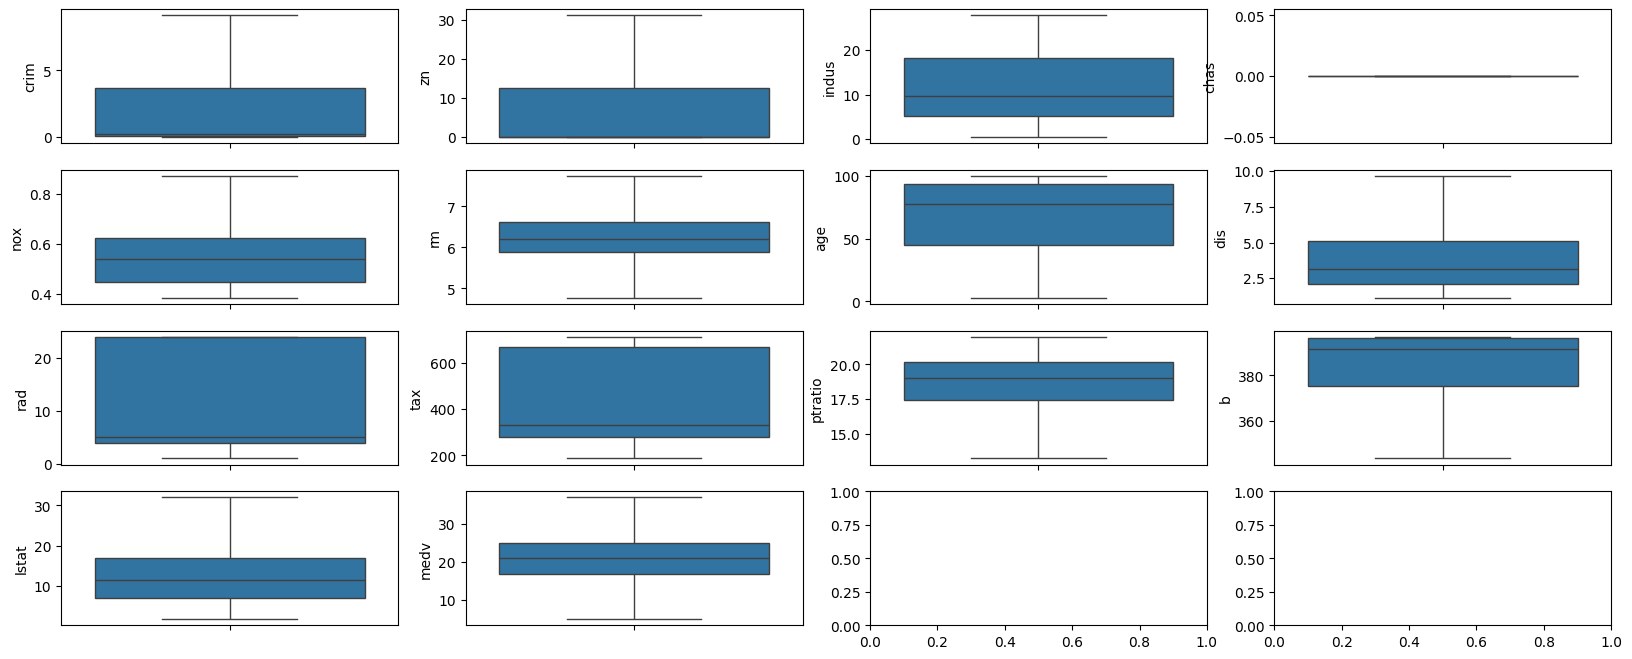

In [169]:
fig, ax = plt.subplots(4, 4, figsize=(20, 8))

ax = ax.flatten()

cnt = 0
for column in df.select_dtypes("number").columns:
  sns.boxplot(df[column], ax = ax[cnt])
  cnt += 1

In [170]:
X = df.drop("medv", axis=1)
y = df["medv"]

In [171]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [172]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor()
}

In [173]:
for model_name in models.keys():
  model = models[model_name]
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print("*" * 75)
  print(model_name)
  print("MSE", mean_squared_error(y_test, y_pred))
  print("MAE", mean_absolute_error(y_test, y_pred))
  print("R2", r2_score(y_test, y_pred))
  scorer = make_scorer(mean_absolute_error)
  print("Cross Val Score MAE", np.mean(cross_val_score(model, X_train, y_train, cv = 5, scoring = scorer)))
  print("Cross Val Score R2", np.mean(cross_val_score(model, X_train, y_train, cv = 5, scoring = "r2")))

***************************************************************************
Linear Regression
MSE 12.711871467382219
MAE 2.7056141798959623
R2 0.7565500958005287
Cross Val Score MAE 2.8038722532522327
Cross Val Score R2 0.7636041171418224
***************************************************************************
Random Forest
MSE 7.148834772277231
MAE 1.9389900990099018
R2 0.8630899356625463
Cross Val Score MAE 2.0168500000000003
Cross Val Score R2 0.8568744495945542


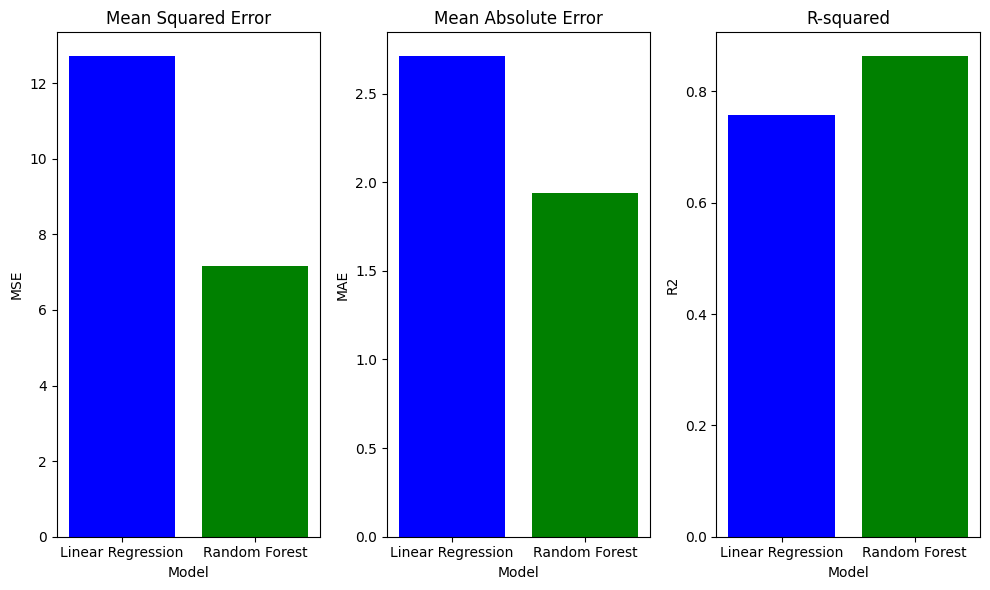

In [175]:
# Evaluation metrics for Linear Regression and Random Forest models
evaluation_metrics = {
    "Model": ["Linear Regression", "Random Forest"],
    "MSE": [12.71, 7.15],
    "MAE": [2.71, 1.94],
    "R2": [0.757, 0.863]
}

# Plotting
plt.figure(figsize=(10, 6))

# Plot MSE
plt.subplot(1, 3, 1)
plt.bar(evaluation_metrics["Model"], evaluation_metrics["MSE"], color=['blue', 'green'])
plt.xlabel("Model")
plt.ylabel("MSE")
plt.title("Mean Squared Error")

# Plot MAE
plt.subplot(1, 3, 2)
plt.bar(evaluation_metrics["Model"], evaluation_metrics["MAE"], color=['blue', 'green'])
plt.xlabel("Model")
plt.ylabel("MAE")
plt.title("Mean Absolute Error")

# Plot R2
plt.subplot(1, 3, 3)
plt.bar(evaluation_metrics["Model"], evaluation_metrics["R2"], color=['blue', 'green'])
plt.xlabel("Model")
plt.ylabel("R2")
plt.title("R-squared")

plt.tight_layout()
plt.show()